### Introduction

Defend the AB test results and explain why Scibids performed well.

Estimate the financial impact of Scibids on the campaign.

### Library import

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Basic Info for the dataset

In [6]:
AB_test = pd.read_excel('AB Test.xlsx')
DSP_Data_Set = pd.read_excel('AB Test.xlsx', sheet_name='AB DSP Data Set')
DCM_Data_Set = pd.read_excel('AB Test.xlsx', sheet_name='AB DCM Data Set')

In [7]:
DSP_Data_Set.head()

,Insertion Order,Line Item,Date,App/URL,Creative Size,Creative ID,Device Type,Exchange,Floodlight Activity Name,Impressions,Clicks,Click Rate (CTR),Total Conversions,Post-Click Conversions,Post-View Conversions,Revenue (Adv Currency),Media Cost (Advertiser Currency)
0,Display_US_DV360_WK21_TNT_PROSP_Banners_Brand,Display_US_DV360_WK21_TNT_PROSP_Banner_Affinity,2021-07-01,10best.com,300x250,352189726,Smart Phone,Google Ad Manager,Unknown,3,1,0.3333,0,0,0,0.015311,0.012023
1,Display_US_DV360_WK21_TNT_PROSP_Banners_Brand,Display_US_DV360_WK21_TNT_PROSP_Banner_Affinity,2021-07-01,20minutos.es,300x600,366705408,Smart Phone,Google Ad Manager,Unknown,1,0,0.0000,0,0,0,0.002099,0.001301
2,Display_US_DV360_WK21_TNT_PROSP_Banners_Brand,Display_US_DV360_WK21_TNT_PROSP_Banner_Affinity,2021-07-01,20minutos.es,300x600,366713909,Smart Phone,Smart RTB+ (Smartadserver),Unknown,1,0,0.0000,0,0,0,0.004124,0.003125
3,Display_US_DV360_WK21_TNT_PROSP_Banners_Brand,Display_US_DV360_WK21_TNT_PROSP_Banner_Affinity,2021-07-01,247sports.com,300x250,352189726,Desktop,Google Ad Manager,Unknown,2,0,0.0000,0,0,0,0.009064,0.006986
4,Display_US_DV360_WK21_TNT_PROSP_Banners_Brand,Display_US_DV360_WK21_TNT_PROSP_Banner_Affinity,2021-07-01,247sports.com,300x250,352189726,Smart Phone,Google Ad Manager,Unknown,4,0,0.0000,0,0,0,0.010723,0.007300


In [8]:
DCM_Data_Set.head()

,Placement,Date,Line Item,Month,Impressions,Clicks,Remarketing : Sitewide Remarketing: Click-through Conversions,Remarketing : Sitewide Remarketing: View-through Conversions,Remarketing : Sitewide Remarketing: Total Conversions
0,Display_US_DV360_WK12_TNT_PROSP_Banner_Affinit...,2021-07-01,Display_US_DV360_WK12_TNT_PROSP_Banner_Affinit...,2021-07,2179,7,3,3,6
1,Display_US_DV360_WK12_TNT_PROSP_Banner_Affinit...,2021-07-02,Display_US_DV360_WK12_TNT_PROSP_Banner_Affinit...,2021-07,2871,0,0,0,0
2,Display_US_DV360_WK12_TNT_PROSP_Banner_Affinit...,2021-07-01,Display_US_DV360_WK12_TNT_PROSP_Banner_Affinit...,2021-07,1883,4,1,0,1
3,Display_US_DV360_WK12_TNT_PROSP_Banner_Affinit...,2021-07-02,Display_US_DV360_WK12_TNT_PROSP_Banner_Affinit...,2021-07,2408,8,1,1,2
4,Display_US_DV360_WK12_TNT_PROSP_Banner_Affinit...,2021-07-01,Display_US_DV360_WK12_TNT_PROSP_Banner_Affinit...,2021-07,109481,354,116,416,532


In [9]:
DSP_Data_Set.shape

(362976, 17)

In [10]:
DCM_Data_Set.shape

(578, 9)

In [11]:
# Check whether DSP contains null value
print(DSP_Data_Set.isnull().sum())

Insertion Order                     0
Line Item                           0
Date                                0
App/URL                             0
Creative Size                       0
Creative ID                         0
Device Type                         0
Exchange                            0
Floodlight Activity Name            0
Impressions                         0
Clicks                              0
Click Rate (CTR)                    0
Total Conversions                   0
Post-Click Conversions              0
Post-View Conversions               0
Revenue (Adv Currency)              0
Media Cost (Advertiser Currency)    0
dtype: int64


In [12]:
# Check whether DCM contains null value
print(DCM_Data_Set.isnull().sum())

Placement                                                        0
Date                                                             0
Line Item                                                        0
Month                                                            0
Impressions                                                      0
Clicks                                                           0
Remarketing : Sitewide Remarketing: Click-through Conversions    0
Remarketing : Sitewide Remarketing: View-through Conversions     0
Remarketing : Sitewide Remarketing: Total Conversions            0
dtype: int64


### Preparation for the Data Analysis

For analysing and calculating aggregate metrics for the DSP values and validate with DCM. It needs to seperating the data for Scibids and Clients first and then to measure whether it has the reliability.

To Seperate the data between Scibids and Clients for DSP

In [13]:
# To Select Scibids based on the insertion order for DSP
insertion_order_Scibids = 'Display_US_DV360_WK21_TNT_PROSP_Banners_Brand_SciBids'
DSP_Scibids = DSP_Data_Set[DSP_Data_Set['Insertion Order'] == insertion_order_Scibids]
DSP_Scibids.head()
DSP_Scibids.shape

(194615, 17)

In [14]:
# To Select Clients based on the insertion order for DSP
insertion_order_Clients = 'Display_US_DV360_WK21_TNT_PROSP_Banners_Brand'
DSP_Clients = DSP_Data_Set[DSP_Data_Set['Insertion Order'] == insertion_order_Clients]
DSP_Clients.head()
DSP_Clients.shape

(168361, 17)

To Seperate the data between Scibids and Client for DCM

In [15]:
# To Select Scibids based on the line item for DCM
line_item_Scibids = [
    'Display_US_DV360_WK12_TNT_PROSP_Banner_Affinity_SciBids',
    'Display_US_DV360_WK12_TNT_PROSP_Banner_InMarketShoes_SciBids',
    'Display_US_DV360_WK12_TNT_PROSP_Banner_KeywordsBrand_SciBids'
]
DCM_Scibids = DCM_Data_Set[DCM_Data_Set['Line Item'].isin(line_item_Scibids)]
DCM_Scibids.shape

(287, 9)

In [16]:
# To Select Clients based on the line item for DCM
line_item_Clients = [
    'Display_US_DV360_WK21_TNT_PROSP_Banner_Affinity',
    'Display_US_DV360_WK21_TNT_PROSP_Banner_InMarketShoes',
    'Display_US_DV360_WK21_TNT_PROSP_Banner_KeywordsBrand'
]
DCM_Clients = DCM_Data_Set[DCM_Data_Set['Line Item'].isin(line_item_Clients)]
DCM_Clients.shape

(291, 9)

### Daily and Total KPI Analysis

To analyse the trend and make the comparison between Scibids KPI and Clients KPI, it needs to group by date and produce the visualisation.

In [17]:
# Selecting Daily Impression, Clicks and Media from DSP Scibids
DSP_Scibids_Daily = DSP_Scibids.groupby('Date').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Media Cost (Advertiser Currency)': 'sum'
}).reset_index()

# Selecting Daily Total Conversion from DCM Scibids
DCM_Scibids_Daily = DCM_Scibids.groupby('Date').agg({
    'Remarketing : Sitewide Remarketing: Total Conversions': 'sum'
}).reset_index()

Daily_KPI_Scibids = pd.merge(DSP_Scibids_Daily, DCM_Scibids_Daily, on=["Date"])

# Calculating daily CTR, CPA for Scibids
Daily_KPI_Scibids['CTR'] = Daily_KPI_Scibids['Clicks'] / Daily_KPI_Scibids['Impressions'] * 100
Daily_KPI_Scibids['CPA'] = Daily_KPI_Scibids['Media Cost (Advertiser Currency)'] / Daily_KPI_Scibids['Remarketing : Sitewide Remarketing: Total Conversions']

Daily_KPI_Scibids

,Date,Impressions,Clicks,Media Cost (Advertiser Currency),Remarketing : Sitewide Remarketing: Total Conversions,CTR,CPA
0,2021-07-01,70761,208,153.817909,701,0.293947,0.219426
1,2021-07-02,122046,512,329.098393,693,0.419514,0.474889
2,2021-07-03,121007,556,328.969329,903,0.459478,0.364307
3,2021-07-04,129792,596,322.951849,936,0.459196,0.345034
4,2021-07-05,133356,548,321.902411,1000,0.410930,0.321902
5,2021-07-06,178438,476,294.061586,934,0.266759,0.314841
6,2021-07-07,233143,656,262.570111,869,0.281372,0.302152
7,2021-07-08,173491,659,285.412047,1025,0.379847,0.278451
8,2021-07-09,135380,572,242.721885,770,0.422514,0.315223
9,2021-07-10,146081,733,292.954604,1047,0.501776,0.279804


In [18]:
# Selecting Daily Impression, Clicks and Media from DSP Clients
DSP_Clients_Daily = DSP_Clients.groupby('Date').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Media Cost (Advertiser Currency)': 'sum'
}).reset_index()

# Selecting Daily Total Conversions from DCM Clients
DCM_Clients_Daily = DCM_Clients.groupby('Date').agg({
    'Remarketing : Sitewide Remarketing: Total Conversions': 'sum'
}).reset_index()

Daily_KPI_Clients = pd.merge(DSP_Clients_Daily, DCM_Clients_Daily, on=["Date"])

# Calculating daily CTR, CPA for Clients
Daily_KPI_Clients['CTR'] = Daily_KPI_Clients['Clicks'] / Daily_KPI_Clients['Impressions'] * 100
Daily_KPI_Clients['CPA'] = Daily_KPI_Clients['Media Cost (Advertiser Currency)'] / Daily_KPI_Clients['Remarketing : Sitewide Remarketing: Total Conversions']

Daily_KPI_Clients

,Date,Impressions,Clicks,Media Cost (Advertiser Currency),Remarketing : Sitewide Remarketing: Total Conversions,CTR,CPA
0,2021-07-01,28677,179,173.090589,702,0.624194,0.246568
1,2021-07-02,55035,354,370.168677,1071,0.643227,0.345629
2,2021-07-03,51788,375,339.523239,1015,0.724106,0.334506
3,2021-07-04,61213,443,367.298017,937,0.723702,0.391994
4,2021-07-05,61846,380,367.064033,906,0.614429,0.405148
5,2021-07-06,66792,443,362.619404,1093,0.663253,0.331765
6,2021-07-07,74301,567,357.182159,880,0.763112,0.405889
7,2021-07-08,74478,518,356.740304,911,0.695507,0.391592
8,2021-07-09,70599,475,359.524002,835,0.672814,0.430568
9,2021-07-10,65432,480,365.056609,952,0.733586,0.383463


In [27]:
# Sum the daily metrics of Scibids
July_KPI_Scibids = Daily_KPI_Scibids.agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Media Cost (Advertiser Currency)': 'sum',
    'Remarketing : Sitewide Remarketing: Total Conversions': 'sum'
}).to_frame().T

# Calculate overall CTR, CPA, Cost and Conversion of Scibdis
July_KPI_Scibids['CTR'] = July_KPI_Scibids['Clicks'] / July_KPI_Scibids['Impressions'] * 100
July_KPI_Scibids['CPA'] = July_KPI_Scibids['Media Cost (Advertiser Currency)'] / July_KPI_Scibids['Remarketing : Sitewide Remarketing: Total Conversions']
July_KPI_Scibids['Cost per Click'] = July_KPI_Scibids['Media Cost (Advertiser Currency)'] / July_KPI_Scibids['Clicks']
July_KPI_Scibids['Conversion Rate'] = (July_KPI_Scibids['Remarketing : Sitewide Remarketing: Total Conversions'] / July_KPI_Scibids["Clicks"]) * 100

# Sum the daily metrics of Clients
July_KPI_Clients = Daily_KPI_Clients.agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Media Cost (Advertiser Currency)': 'sum',
    'Remarketing : Sitewide Remarketing: Total Conversions': 'sum'
}).to_frame().T

# Calculate overall CTR, CPA, Cost and Conversion of Clients
July_KPI_Clients['CTR'] = July_KPI_Clients['Clicks'] / July_KPI_Clients['Impressions'] * 100
July_KPI_Clients['CPA'] = July_KPI_Clients['Media Cost (Advertiser Currency)'] / July_KPI_Clients['Remarketing : Sitewide Remarketing: Total Conversions']
July_KPI_Clients['Cost per Click'] = July_KPI_Clients['Media Cost (Advertiser Currency)'] / July_KPI_Clients['Clicks']
July_KPI_Clients['Conversion Rate'] = (July_KPI_Clients['Remarketing : Sitewide Remarketing: Total Conversions'] / July_KPI_Clients["Clicks"]) * 100

# Display Total KPIs of Scibids and Clients
July_KPI_Scibids['Group'] = 'Scibids'
July_KPI_Clients['Group'] = 'Clients'
Combined_Monthly_KPI = pd.concat([July_KPI_Scibids, July_KPI_Clients], ignore_index=True)
Combined_Monthly_KPI


,Impressions,Clicks,Media Cost (Advertiser Currency),Remarketing : Sitewide Remarketing: Total Conversions,CTR,CPA,Cost per Click,Conversion Rate,Group
0,5304097.0,19868.0,9067.627821,26378.0,0.374578,0.343757,0.456394,132.766257,Scibids
1,2046269.0,13599.0,11019.071091,22827.0,0.664575,0.482721,0.810285,167.857931,Clients


Based on the result generated above, we could see that Scibids'CTR and conversion rate are lower than Clients. That is because of the total Impressions higher than Clients too much (5304097 and 2046269) which makes CTR and Conversion Rate to be lower but it does not means Scibids has poor performance. From the cost side, Scibids has better in Cost and especially Cost per Click and CPA, which has saved good money. It also made more Total Conversions.

Overall the all we could make the conclusion that Scibids algo made better than Clients.

### Estimation of Financial Impact

To calculate the overall financial impact of Scibids, we divide it into two parts: savings and incremental value.

For the savings, we assume that the theoretical cost is the client's cost. Based on the same conversion which Scibids has the better one, to compare with Scibids' cost (actual cost) to estimate the savings therefore we could get the financial savings achieved.

For the incremental value, based on how many conversions Scibids has made and multiple with clients cpa to see the overall increasement it has made.

Finally to sum the savings and incremental value to estimate the total financial impact.



In [24]:
def cal_financial_impact(July_KPI_Clients, July_KPI_Scibids):
    clients_cpa = July_KPI_Clients['CPA']
    scibids_cpa = July_KPI_Scibids['CPA']
    scibids_conversions = July_KPI_Scibids['Remarketing : Sitewide Remarketing: Total Conversions']
    clients_conversions = July_KPI_Clients['Remarketing : Sitewide Remarketing: Total Conversions']

    # Calculation for Savings
    actual_cost = July_KPI_Scibids['Media Cost (Advertiser Currency)'].iloc[0]
    theoretical_cost = clients_cpa * scibids_conversions.iloc[0] # To use Clients CPA multiple Scibids Conversion for theoretical cost

    savings = theoretical_cost - actual_cost
    savings_percentage = (savings / theoretical_cost) * 100

    # Calculation for incremental value
    incremental_conversions = scibids_conversions - clients_conversions
    incremental_value = incremental_conversions * clients_cpa

    # Sum of the total financial impact
    total_financial_impact = savings.iloc[0] + incremental_value.iloc[0]

    return {
        "actual_cost": round(actual_cost, 2),
        "theoretical_cost": round(theoretical_cost.iloc[0], 2),
        "savings": round(savings.iloc[0], 2),
        "savings_percentage": round(savings_percentage.iloc[0], 2),
        "incremental_conversions": incremental_conversions.iloc[0],
        "incremental_value": round(incremental_value.iloc[0], 2),
        "total_impact": round(total_financial_impact, 2),
    }

In [31]:
financial_impact = cal_financial_impact(July_KPI_Clients, July_KPI_Scibids)
financial_impact

{'actual_cost': 9067.63,
 'theoretical_cost': 12733.21,
 'savings': 3665.59,
 'savings_percentage': 28.79,
 'incremental_conversions': 3551.0,
 'incremental_value': 1714.14,
 'total_impact': 5379.73}

### Visualisation

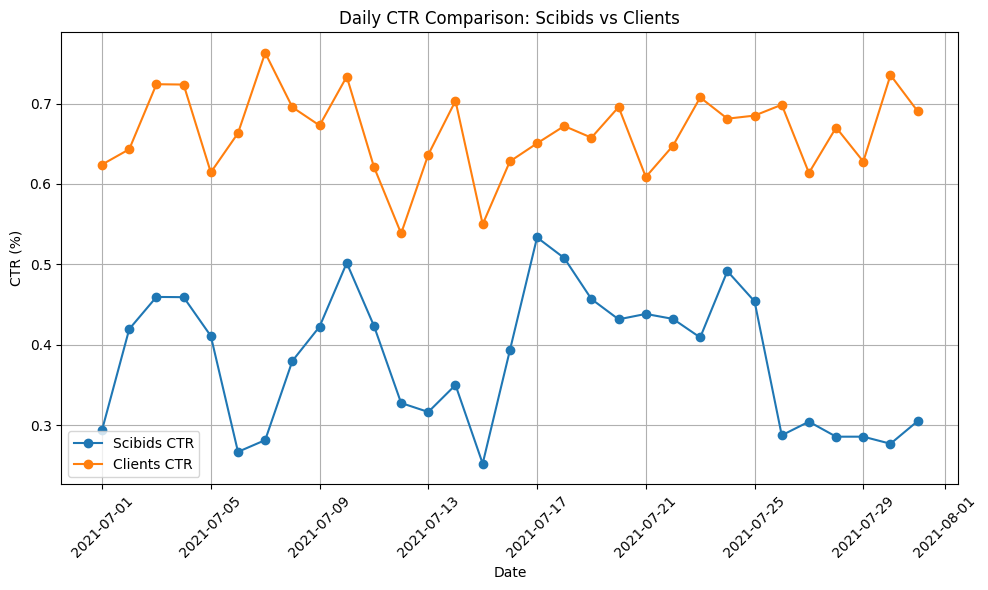

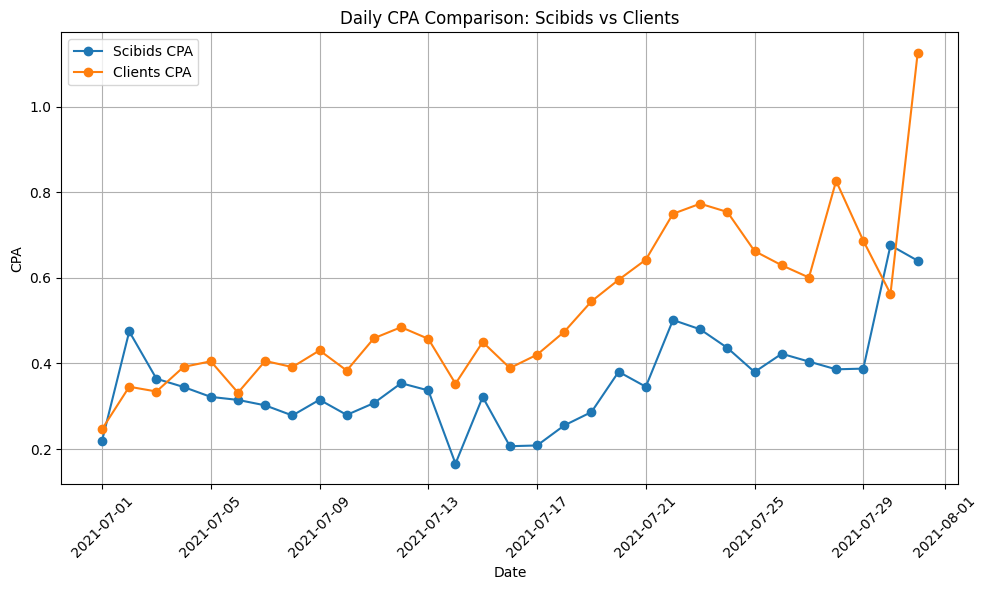

In [ ]:
# CTR Comparison between Scibids and Clients
plt.figure(figsize=(10, 6))
plt.plot(Daily_KPI_Scibids['Date'], Daily_KPI_Scibids['CTR'], label='Scibids CTR', marker='o')
plt.plot(Daily_KPI_Clients['Date'], Daily_KPI_Clients['CTR'], label='Clients CTR', marker='o')
plt.xlabel('Date')
plt.ylabel('CTR (%)')
plt.title('Daily CTR Comparison: Scibids vs Clients')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CPA Comparison between Scibids and Clients
plt.figure(figsize=(10, 6))
plt.plot(Daily_KPI_Scibids['Date'], Daily_KPI_Scibids['CPA'], label='Scibids CPA', marker='o')
plt.plot(Daily_KPI_Clients['Date'], Daily_KPI_Clients['CPA'], label='Clients CPA', marker='o')
plt.xlabel('Date')
plt.ylabel('CPA')
plt.title('Daily CPA Comparison: Scibids vs Clients')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

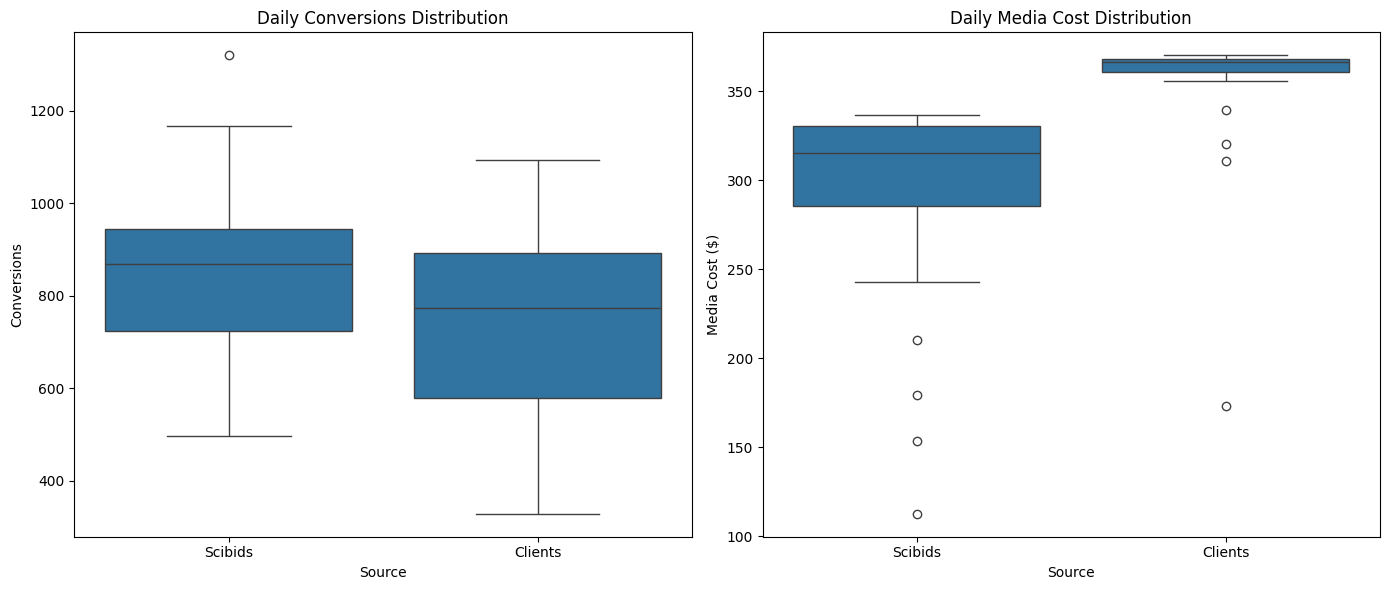

In [35]:
# Prepare data for plotting
plot_data_conversions = pd.concat([
    Daily_KPI_Scibids[["Remarketing : Sitewide Remarketing: Total Conversions"]].assign(Source="Scibids"),
    Daily_KPI_Clients[["Remarketing : Sitewide Remarketing: Total Conversions"]].assign(Source="Clients")
])

plot_data_costs = pd.concat([
    Daily_KPI_Scibids[["Media Cost (Advertiser Currency)"]].assign(Source="Scibids"),
    Daily_KPI_Clients[["Media Cost (Advertiser Currency)"]].assign(Source="Clients")
])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Daily Conversions
sns.boxplot(
    data=plot_data_conversions,
    x="Source",
    y="Remarketing : Sitewide Remarketing: Total Conversions",
    ax=axes[0]
)
axes[0].set_title("Daily Conversions Distribution")
axes[0].set_ylabel("Conversions")

# Boxplot for Daily Cost
sns.boxplot(
    data=plot_data_costs,
    x="Source",
    y="Media Cost (Advertiser Currency)",
    ax=axes[1]
)
axes[1].set_title("Daily Media Cost Distribution")
axes[1].set_xlabel("Source")
axes[1].set_ylabel("Media Cost ($)")

plt.tight_layout()
plt.show()


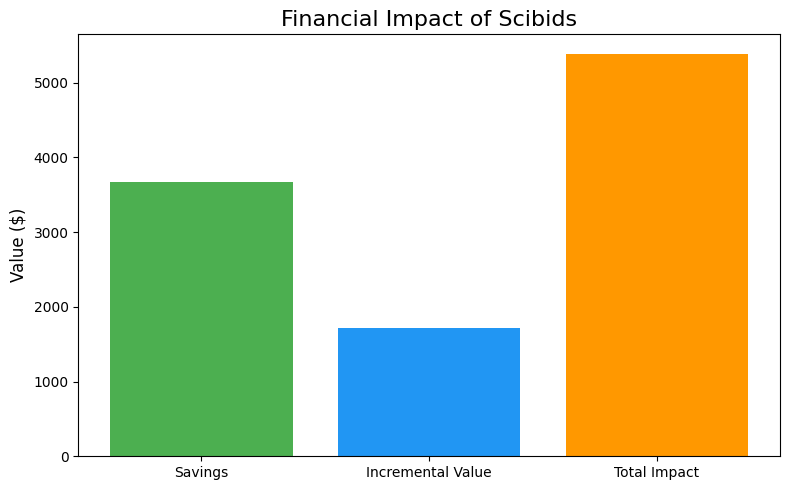

In [36]:
# Bar Chart for Comparison of Savings, Incremental Value and Financial Impact
categories = ["Savings", "Incremental Value", "Total Impact"]
values = [financial_impact["savings"], financial_impact["incremental_value"], financial_impact["total_impact"]]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=["#4caf50", "#2196f3", "#ff9800"])
plt.title("Financial Impact of Scibids", fontsize=16)
plt.ylabel("Value ($)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

### Conclusion

The AB test results demonstrate that Scibids has better performance than Clients in:

CTR: Although Scibids CTR lower than Clients, the impressions are much higher than Clients which means Scibids has larger audiences.

CPA: Scibids achieved a lower CPA, proving its cost-efficiency in driving conversions.

Total Conversions: Scibids generated more conversions than Clients to show that it has better targetting.

**Based on the reasons above, we could see that Scibids outperformed Clients in efficiency for cost and conversions and made more impact**


For the estimation of financial impact of Scibids:

Scibids estimated savings are 3,665.59 which are 28.79% of the theoretical cost and delivered 3551 more conversions which increased 1714.14 value.

**Therefore the estimated total financial impact by combining savings and incremental value is 5379.73**